## <center> Visualization on OSNACA dataset  </center>


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from time import time
import math

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [26]:
%matplotlib inline

In [27]:
#Reading the data
data1 = pd.read_excel('../data/osnaca/osnaca-data2.xlsx')
data1.head()

,Sample,Code,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,...,LONG,LAT,Deposit Name,Donor,Three Character Code,Country,State,Class,Sub Class,Your Sample ID
0,700001,NaN,0.438,0.002,0.002,0.362,10.60,0.02,0.39,91.5,...,149.569996,-35.062625,Woodlawn,Carl Brauhart,WLN,Australia,New South Wales,VHMS,NaN,NaN
1,700002,NaN,0.093,0.001,0.002,0.095,125.00,0.22,0.12,44.0,...,149.569996,-35.062625,Woodlawn,Carl Brauhart,WLN,Australia,New South Wales,VHMS,NaN,NaN
2,700003,NaN,1.41,0.002,0.002,1.39,120.00,0.02,62.9,215.0,...,145.515162,-41.841336,Hercules,Carl Brauhart,HER,Australia,Tasmania,VHMS,NaN,NaN
3,700004,1,0.096,0.003,0.005,0.086,0.72,0.80,0.03,2.5,...,-49.177603,-13.975260,Mara Rosa-(Zacarias mine),Steffen Hageman,MRB,Brazil,Goiás,VHMS,NaN,SH-MR4
4,700005,NaN,2.9,0.003,0.005,3.94,0.34,0.06,4.01,162.0,...,116.963014,-28.777512,Gossan Hill,Steffen Hageman,GHL,Australia,Western Australia,VHMS,NaN,SH-GG9


In [28]:
data1.columns

Index(['Sample', 'Code', 'Au (FA)', 'Pt', 'Pd', 'Au (AR)', 'Bi', 'Te', 'Hg',
       'Ag', 'Al', 'As', 'Ca', 'Cd', 'Co', 'Cr', 'Cs', 'Cu', 'Fe', 'In', 'K',
       'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm',
       'Yb', 'Lu', 'Li', 'Mg', 'Mn', 'Mo', 'Na', 'Nb', 'Ni', 'P', 'Pb', 'Rb',
       'Re', 'S', 'Sb', 'Sc', 'Se', 'Sn', 'Sr', 'Ta', 'Th', 'Ti', 'Tl', 'U',
       'V', 'W', 'Y', 'Zn', 'B', 'Hf', 'Si', 'Zr', 'Be', 'Ga', 'Ge', 'Wt Tot',
       'LONG', 'LAT', 'Deposit Name', 'Donor', 'Three Character Code',
       'Country', 'State', 'Class', 'Sub Class', 'Your Sample ID'],
      dtype='object')

In [29]:
list_of_columns=data1.columns

In [30]:
df = data1.iloc[:, 2:68]

In [31]:
df.isna().any()

Au (FA)    False
Pt         False
Pd         False
Au (AR)    False
Bi         False
           ...  
Si         False
Zr         False
Be         False
Ga         False
Ge         False
Length: 66, dtype: bool

In [32]:
df=df.replace("IS", 0)

In [33]:
df['Hg'] = pd.to_numeric(df['Hg'])

In [34]:
df['Au (FA)'] = pd.to_numeric(df['Au (FA)'])
df['Pt'] = pd.to_numeric(df['Pt'])

In [35]:
df['Au (AR)'] = pd.to_numeric(df['Au (AR)'])
df['Pd'] = pd.to_numeric(df['Pd'])
dftsne = df
dftsne = dftsne.iloc[:,0:66]
dftsne.head()


,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,Al,As,...,W,Y,Zn,B,Hf,Si,Zr,Be,Ga,Ge
0,0.438,0.002,0.002,0.362,10.60,0.02,0.39,91.5,2700,318,...,1.5,1.2,153000,-20,0.4,34200,60,-1.0,11.0,1
1,0.093,0.001,0.002,0.095,125.00,0.22,0.12,44.0,26300,75,...,2.5,18.5,3780,-20,0.2,114000,20,-1.0,2.0,-1
2,1.410,0.002,0.002,1.390,120.00,0.02,62.90,215.0,100,4820,...,4.5,0.3,219000,-20,-0.2,71500,-10,-1.0,-1.0,2
3,0.096,0.003,0.005,0.086,0.72,0.80,0.03,2.5,37800,11,...,1.5,6.3,755,-20,2.0,244000,70,-1.0,-1.0,-1
4,2.900,0.003,0.005,3.940,0.34,0.06,4.01,162.0,19600,1010,...,5.0,4.5,173000,-20,-0.2,142000,-10,-1.0,-1.0,2


## PCA and t_sne visualization

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(dftsne)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = dftsne.columns
df_scaled.head()

,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,Ag,Al,As,...,W,Y,Zn,B,Hf,Si,Zr,Be,Ga,Ge
0,0.000041,0.000197,0.000199,0.000032,0.000077,0.000030,0.000026,0.004488,0.017381,0.000709,...,0.000014,0.002053,0.228364,0.0,0.006369,0.074106,0.031250,0.0,0.020654,0.00590
1,0.000009,0.000132,0.000199,0.000008,0.000906,0.000080,0.000008,0.002159,0.163873,0.000169,...,0.000022,0.029379,0.005649,0.0,0.004246,0.248038,0.013393,0.0,0.005164,0.00000
2,0.000131,0.000197,0.000199,0.000121,0.000870,0.000030,0.004059,0.010542,0.001241,0.010713,...,0.000036,0.000632,0.326871,0.0,0.000000,0.155405,0.000000,0.0,0.000000,0.00885
3,0.000009,0.000263,0.000397,0.000008,0.000005,0.000224,0.000003,0.000125,0.235258,0.000027,...,0.000014,0.010109,0.001134,0.0,0.023355,0.531386,0.035714,0.0,0.000000,0.00000
4,0.000269,0.000263,0.000397,0.000343,0.000003,0.000040,0.000259,0.007944,0.122284,0.002247,...,0.000040,0.007266,0.258214,0.0,0.000000,0.309067,0.000000,0.0,0.000000,0.00885


In [37]:
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [38]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(dftsne)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1139 samples in 0.000s...
[t-SNE] Computed neighbors for 1139 samples in 0.075s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1139
[t-SNE] Computed conditional probabilities for sample 1139 / 1139
[t-SNE] Mean sigma: 14149.185701
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.468563
[t-SNE] KL divergence after 300 iterations: 0.776358


In [39]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [40]:
df['Class']=list(data1["Class"])

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

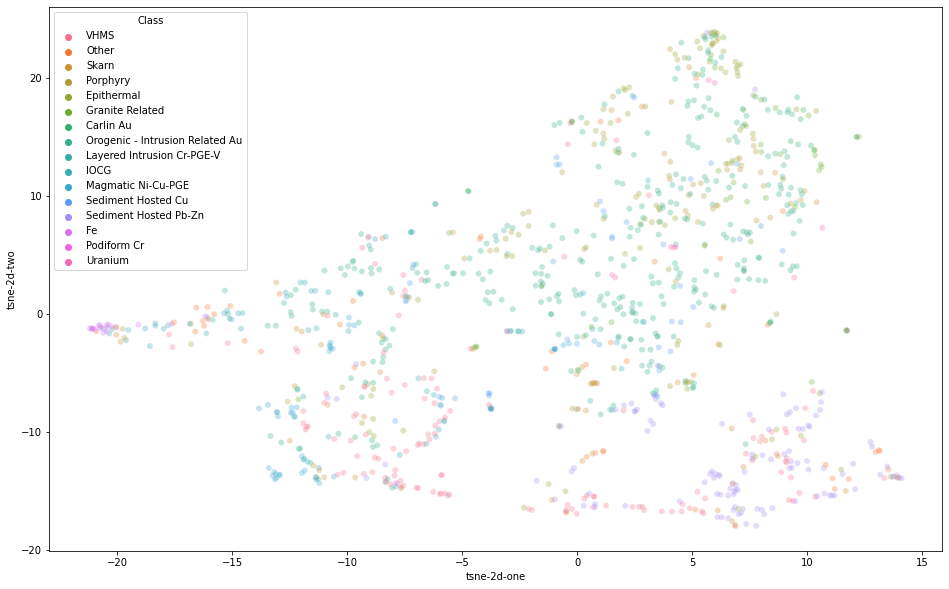

In [51]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",hue="Class",
    data=df,
    legend="full",
    alpha=0.3
)


In [42]:
def safe_ln(x, minval=0.0000000001):
    return np.log(x.clip(min=minval))

In [43]:
df['Zn_scaled']=df_scaled['Zn']
df['Zn_scaled']= np.log(df['Zn_scaled'])

df['Zn_scaled'] = abs(df['Zn_scaled'])
df['Zn_scaled'].replace([np.inf, -np.inf], 0, inplace=True)

C:\Users\caley\anaconda3\envs\Critical Minerals\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
df['Ge_scaled']=df_scaled['Ge']
df['Ge_scaled']= np.log(df['Ge_scaled'])

df['Ge_scaled'] = abs(df['Ge_scaled'])
df['Ge_scaled'].replace([np.inf, -np.inf], 0, inplace=True)

df['Ge_scaled']

0       5.132853
1       0.000000
2       4.727388
3       0.000000
4       4.727388
          ...   
1134    5.132853
1135    5.132853
1136    5.132853
1137    4.439706
1138    5.132853
Name: Ge_scaled, Length: 1139, dtype: float64

TSNE by Ge

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

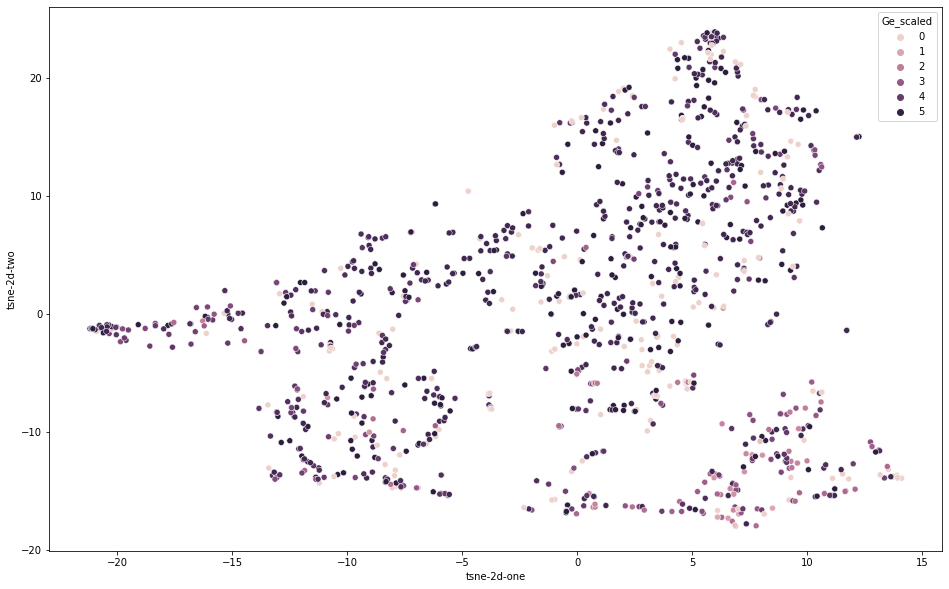

In [49]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",hue="Ge_scaled",
    data=df,
    legend="auto",
    alpha=1
)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

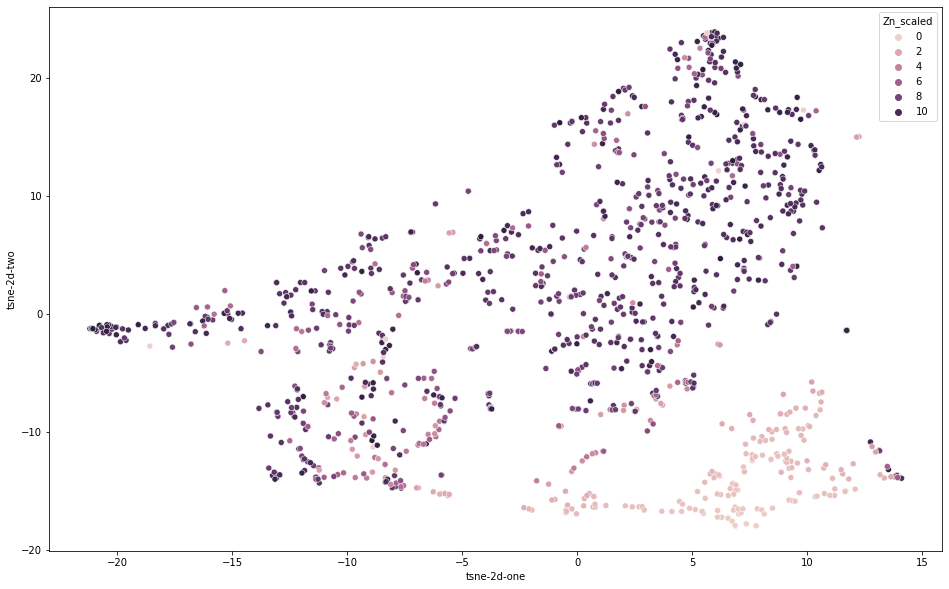

In [46]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",hue="Zn_scaled",
    data=df,
    legend="auto",
    alpha=1
)

In [47]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",hue="Class",
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

ValueError: Could not interpret value `pca-one` for parameter `x`

<Figure size 1152x720 with 0 Axes>

C:\Users\caley\AppData\Local\Temp/ipykernel_9452/3931787417.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


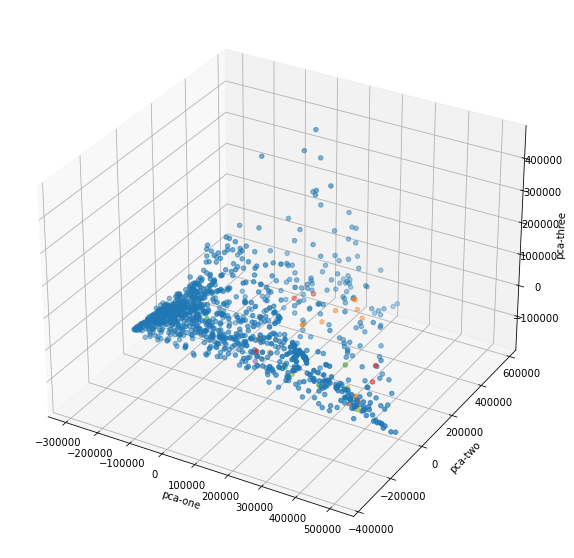

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["In"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()